In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train_data=train
test_data=test

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')


In [8]:
train_data['Datetime']=pd.to_datetime(train_data.Datetime,format='%d-%m-%Y %H:%M')
test_data['Datetime']=pd.to_datetime(test_data.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
for i in (train,test,train_data,test_data):
  i['Year']=i.Datetime.dt.year
  i['Month']=i.Datetime.dt.month
  i['Day']=i.Datetime.dt.day
  i['Hour']=i.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [11]:
train['day_of_week']=train.Datetime.dt.dayofweek
train.tail(5)

,ID,Datetime,Count,Year,Month,Day,Hour,day_of_week
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3


In [12]:
def check_weekend(r):   # finding if a particular day is a weekend or not 
  if(r.dayofweek==5 or r.dayofweek==6):
    return 1
  else:
    return 0

temp=train['Datetime'].apply(check_weekend)


In [13]:
train['weekend']=temp
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [14]:
train.index=train['Datetime']
df=train.drop('ID',axis=1)

Text(0, 0.5, 'Passenger Count')

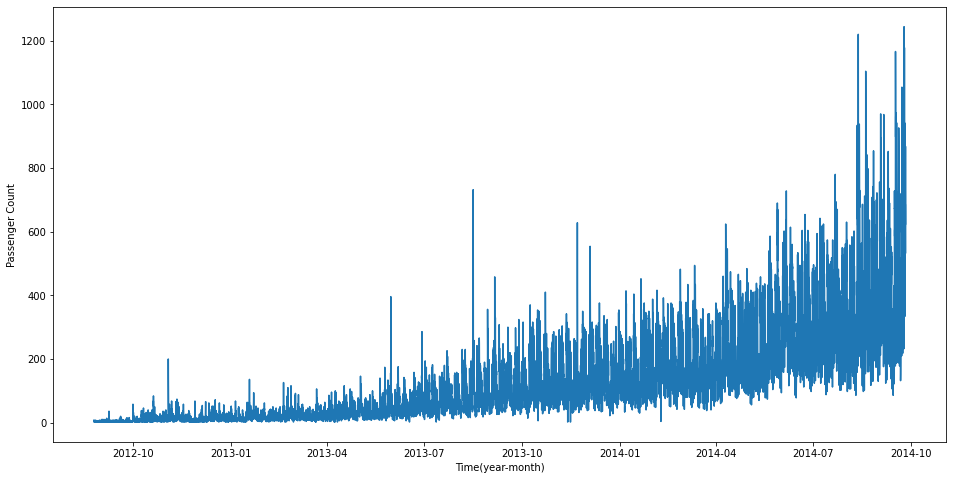

In [15]:
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger count')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')

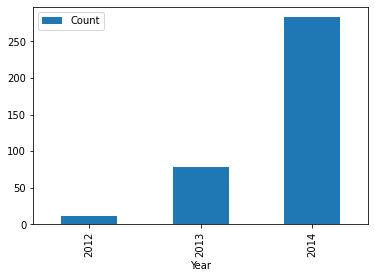

In [16]:
train[['Count','Year']].groupby(['Year']).mean().plot.bar()

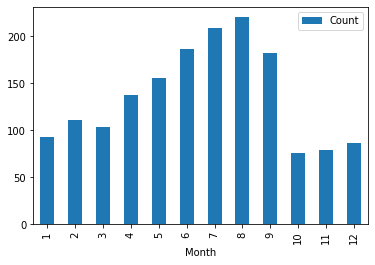

In [17]:
train[['Month','Count']].groupby(['Month']).mean().plot.bar()

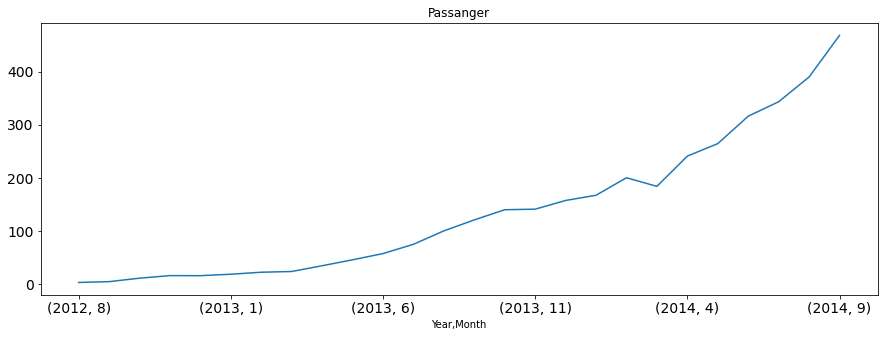

In [18]:
temp=train.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passanger',fontsize=14)

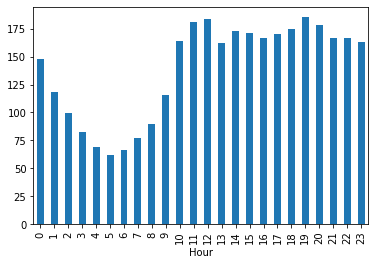

In [19]:
train.groupby('Hour')['Count'].mean().plot.bar()

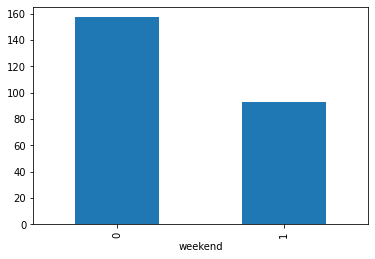

In [20]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [21]:
train=train.drop('ID',axis=1)

In [22]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:M')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [23]:
train.index=train.Timestamp

In [24]:
hourly=train.resample('H').mean()

In [25]:
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthy=train.resample('M').mean()

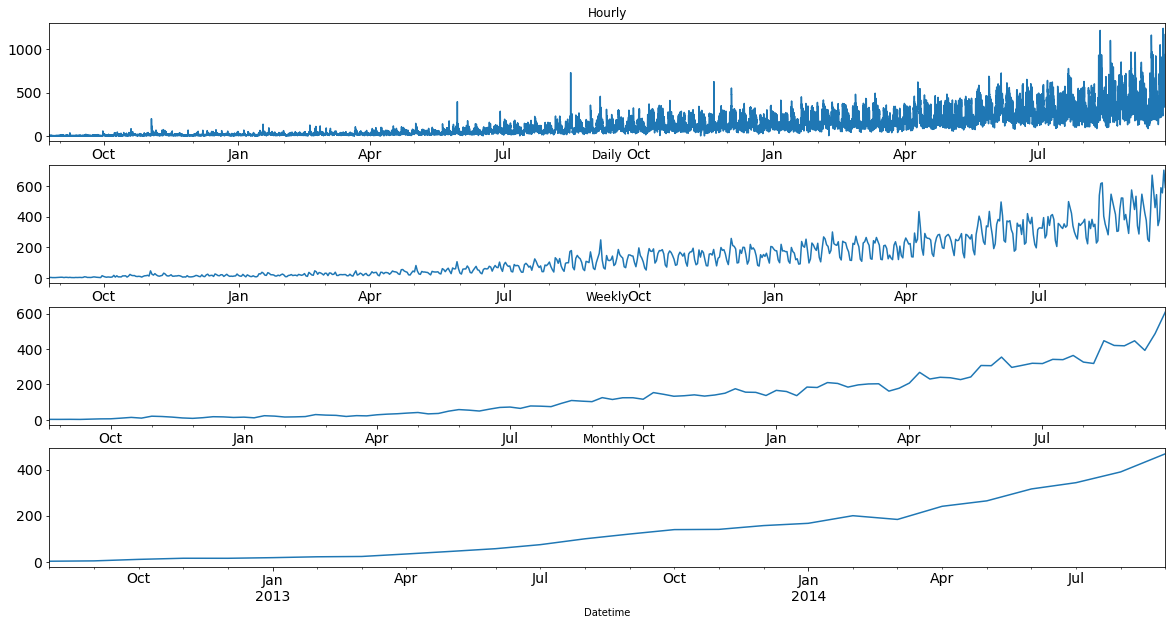

In [26]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(20,10),title="Hourly",fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(20,10),title="Daily",fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(20,10),title="Weekly",fontsize=14,ax=axs[2])
monthy.Count.plot(figsize=(20,10),title="Monthly",fontsize=14,ax=axs[3])


In [27]:
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [28]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp


In [29]:
test=test.resample('D').mean()
train=train.resample('D').mean()

In [30]:
train.head()

,Count,Year,Month,Day,Hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [31]:
# for testing we split the data by the last three months because if we took the data randomly then it will be 
# like pridecting old values using the recent data
# but in timeseries our goal is to predict the future values using the old data avialable over the time.
Train=train.loc['2012-08-25':'2014-06-24',:]   
valid=train.loc['2014-06-24':'2014-09-25',:]     

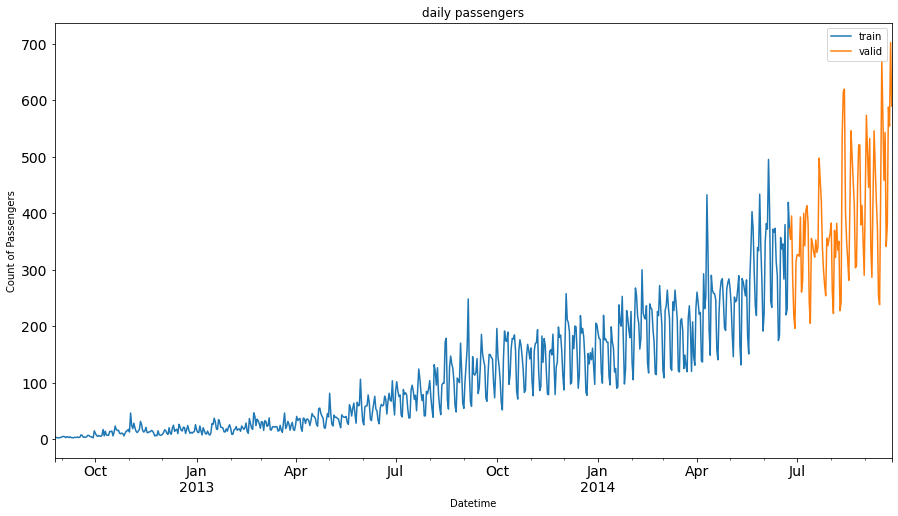

In [32]:
Train.Count.plot(figsize=(15,8),title='daily passengers',fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),fontsize=14,label='valid')
plt.xlabel("Datetime")
plt.ylabel("Count of Passengers")
plt.legend(loc="best")
plt.show()

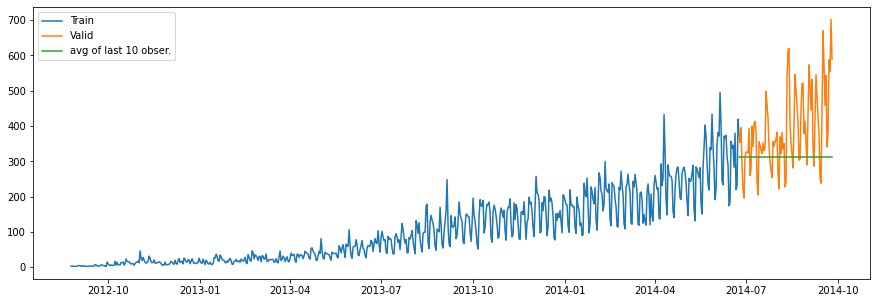

In [33]:
#Modeling Techniques
#Moving Average -take average of the last few time periods
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(10).mean().iloc[-1] #finding avg of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='avg of last 10 obser.')
plt.legend(loc='best')
plt.show()




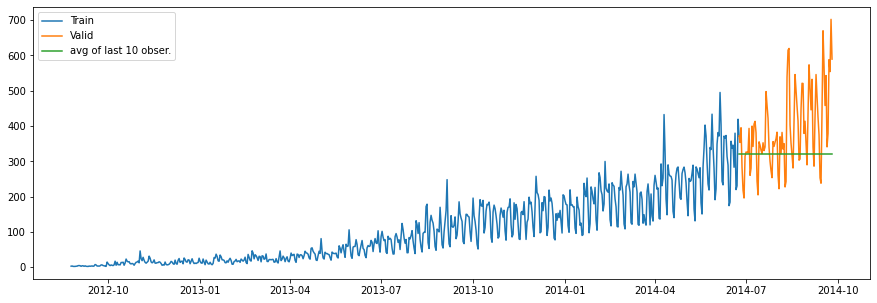

In [34]:
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(30).mean().iloc[-1] #finding avg of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='avg of last 10 obser.')
plt.legend(loc='best')
plt.show()

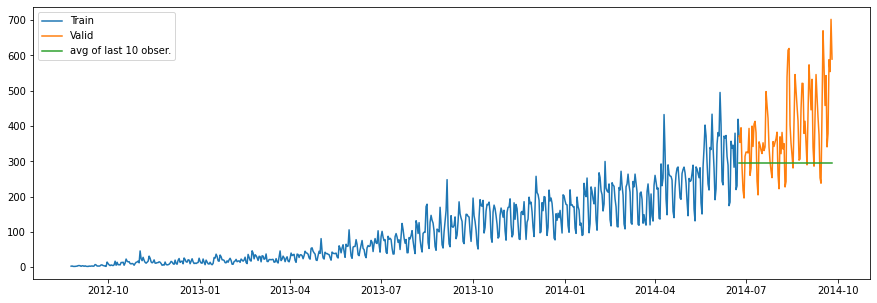

In [35]:
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1] #finding avg of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='avg of last 10 obser.')
plt.legend(loc='best')
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error
rms=math.sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rms)

143.6342031438403


##Simple Exponential Smoothing 
Larger weights are assigned to recent obervations as compare to the weights from the distant past.
<br>Weights decreases exponentially as the observations comes from further in the past.

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg=valid.copy()

fit1=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES']=fit1.forecast(len(valid))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


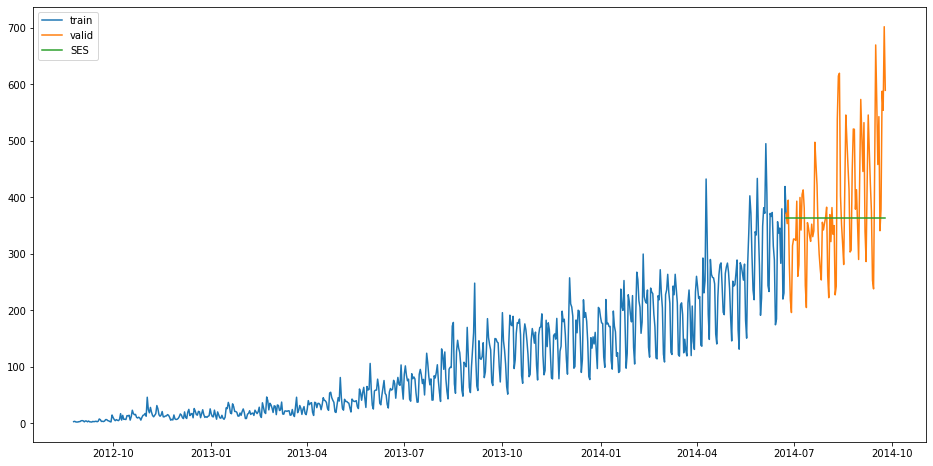

In [38]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [39]:
rms=math.sqrt(mean_squared_error(valid.Count,y_hat_avg.SES)) 
print(rms)           # we can observe that the rms value decreased hence better prediction than avg moving model

112.83560152956802


## Holt's Linear Trend Model
This is an extension of Simple Exponential Smoothing to allow forecasting of data with a trend.
<br>The forecast function in this is a function of level and trend.
<ul>
<li>Trend- increasing or deceasing behaviour of the time series.
<li>Seasonality- repeating behaviour over a time period.

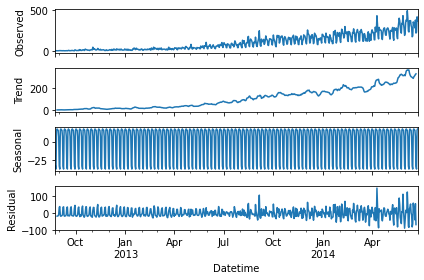

In [40]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

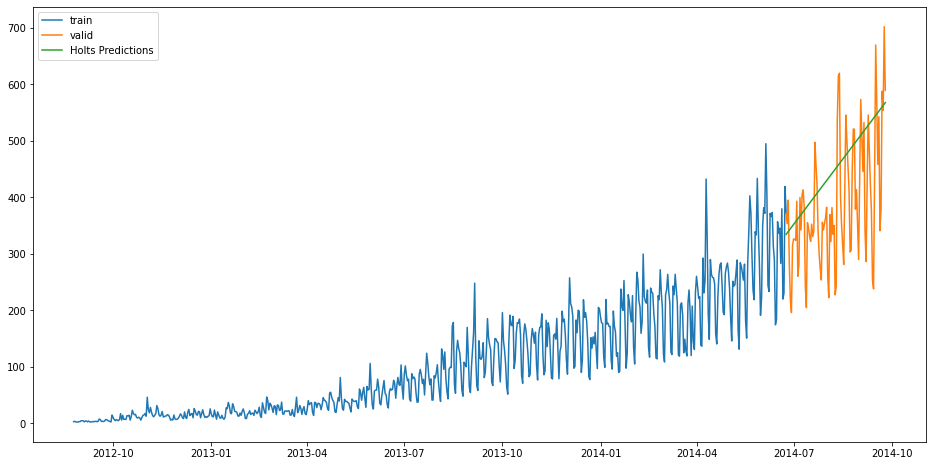

In [41]:
# we can see increasing trend in the data
y_hat_avg=valid.copy()
fit2=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat_avg['Holt_pred']=fit2.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['Holt_pred'],label='Holt''s Predictions')
plt.legend(loc='best')
plt.show()

In [42]:
rms=math.sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_pred))
print(rms)  

113.76729927347026


### Holt Winter's model
It applies exponential smoothening to the seasonal components.

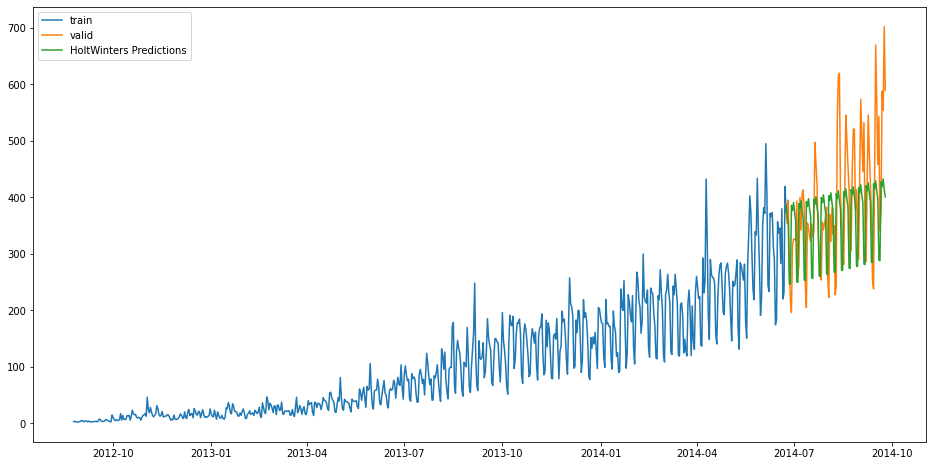

In [43]:
y_hat_avg=valid.copy()
fit3=ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add',).fit()
y_hat_avg['HoltWinter_pred']=fit3.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['HoltWinter_pred'],label='HoltWinter''s Predictions')
plt.legend(loc='best')
plt.show()

In [44]:
rms=math.sqrt(mean_squared_error(valid.Count,y_hat_avg.HoltWinter_pred))
print(rms)

107.3179241316478


## ARIMA

Auto Regression Intergrated Moving Average. It is specified by three ordered parameters (p,d,q).
<ul>
<li> p(lag order) - no. of lag obervations included in the model.<br> The model uses the depenent relationship between an obsrvation and some no. of lagged observations.
<li>d(degree of differencing) - no. of times obervations are differenced(subtracting an observation from an obervation at previous time steps) to make timeseries stationary.
<li>q(order of moving average) - Size of moving average window. 


Stationary Timeseries- It is important to make the series a stationary timeseries so that the variables are independent.
<br> The mean and varience of the series should not be a function of time and the covarience of the ith and (i+m)th term should not be a function of time.

<br>Dicky Fuller Test- To check the stationarity of the series. The intution behind this test is that it determines how strongly a time series is defined by a trend.
<br> The Null hypothesis of this test is that time series is not stationary. If the Test statistics is less than the critical value we reject the null hypothesis and vice versa.




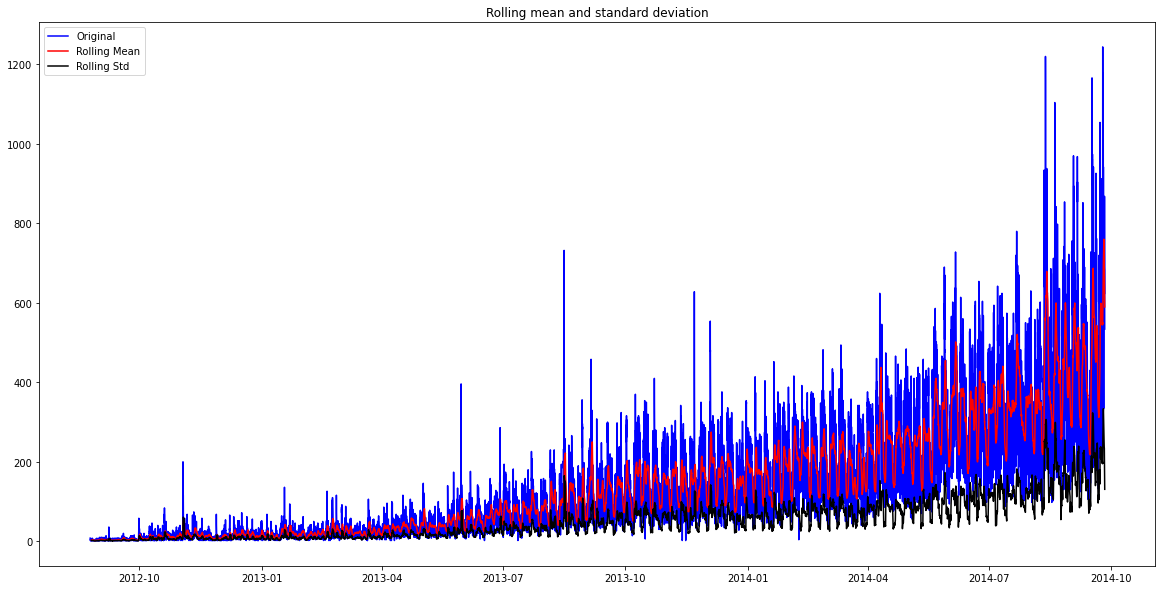

Results of Dickey-Fuller Test
Test Statistic             -4.456561
p-value                     0.000235
#Lags Used                 45.000000
No. if Obeser. used     18242.000000
Critical Value (1%)        -3.430709
Critical Value (5%)        -2.861698
Critical Value (10%)       -2.566854
dtype: float64


In [72]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  rolmean=timeseries.rolling(24).mean() 
  rolstd=timeseries.rolling(24).std();
  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(rolmean,color='red',label='Rolling Mean')
  std=plt.plot(rolstd,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling mean and standard deviation')
  plt.show(block=False)

  # preforming Dickey-Fuller Test:
  print('Results of Dickey-Fuller Test')
  dtest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dtest[0:4],index=['Test Statistic','p-value','#Lags Used','No. if Obeser. used'])
  
  for key,value in dtest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
  print(dfoutput)
  
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

test_stationarity(train_data['Count'])

Test Statistic is less than the critical value. But we can see an increasing trend in the data. So, to make the series more stationary we need to remove trend and sesonality from the data.

### Removing Trend
If we see an increasing trend we can tranform data in a way that penalizes higher values more than lesser values(log transfomation). For this time series we will take rolling avgerage of window size 24, as a day has 24 hours.



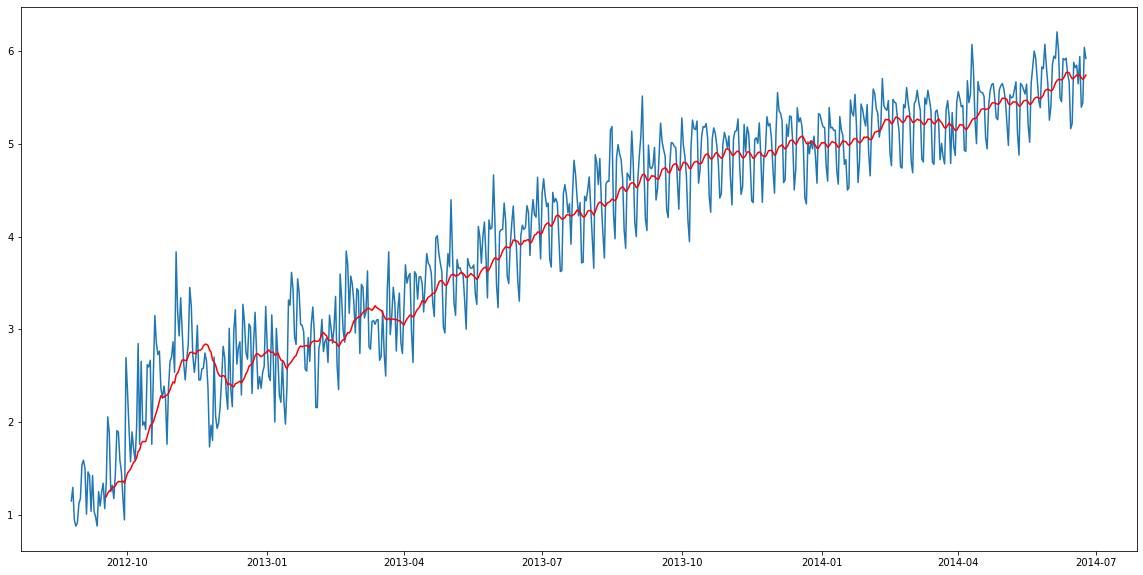

In [70]:
train_log=np.log(Train['Count'])
valid_log=np.log(valid['Count'])

moving_avg=train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg,color='red')
plt.show()


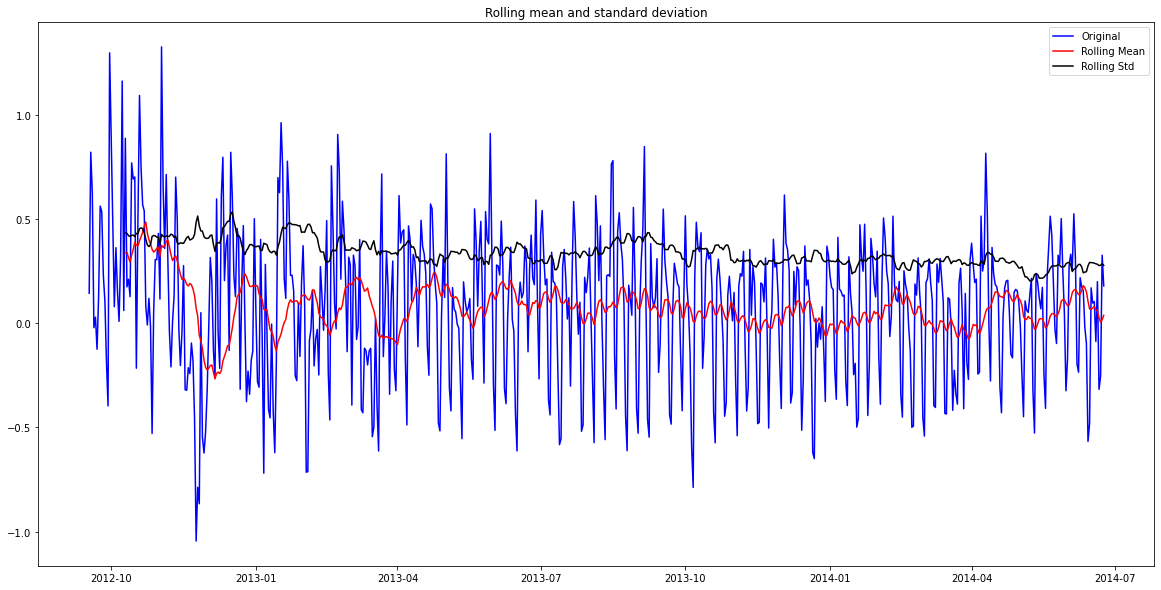

Results of Dickey-Fuller Test
Test Statistic         -5.861646e+00
p-value                 3.399422e-07
#Lags Used              2.000000e+01
No. if Obeser. used     6.250000e+02
Critical Value (1%)    -3.440856e+00
Critical Value (5%)    -2.866175e+00
Critical Value (10%)   -2.569239e+00
dtype: float64


In [73]:
moving_avg_diff=train_log-moving_avg
moving_avg_diff.dropna(inplace=True)
test_stationarity(moving_avg_diff)

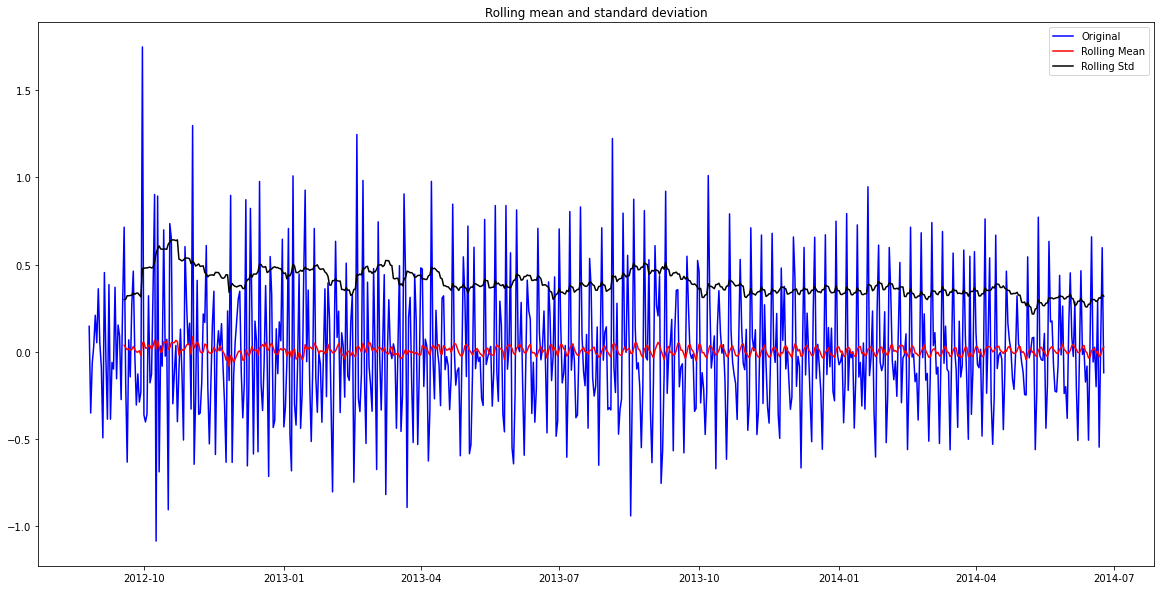

Results of Dickey-Fuller Test
Test Statistic         -8.237568e+00
p-value                 5.834049e-13
#Lags Used              1.900000e+01
No. if Obeser. used     6.480000e+02
Critical Value (1%)    -3.440482e+00
Critical Value (5%)    -2.866011e+00
Critical Value (10%)   -2.569151e+00
dtype: float64


In [74]:
# stabalising mean 
train_log_diff=train_log-train_log.shift(1) # differencing 
test_stationarity(train_log_diff.dropna())

### Removing Seasonality 
Seasonality means periodic fluctuations.


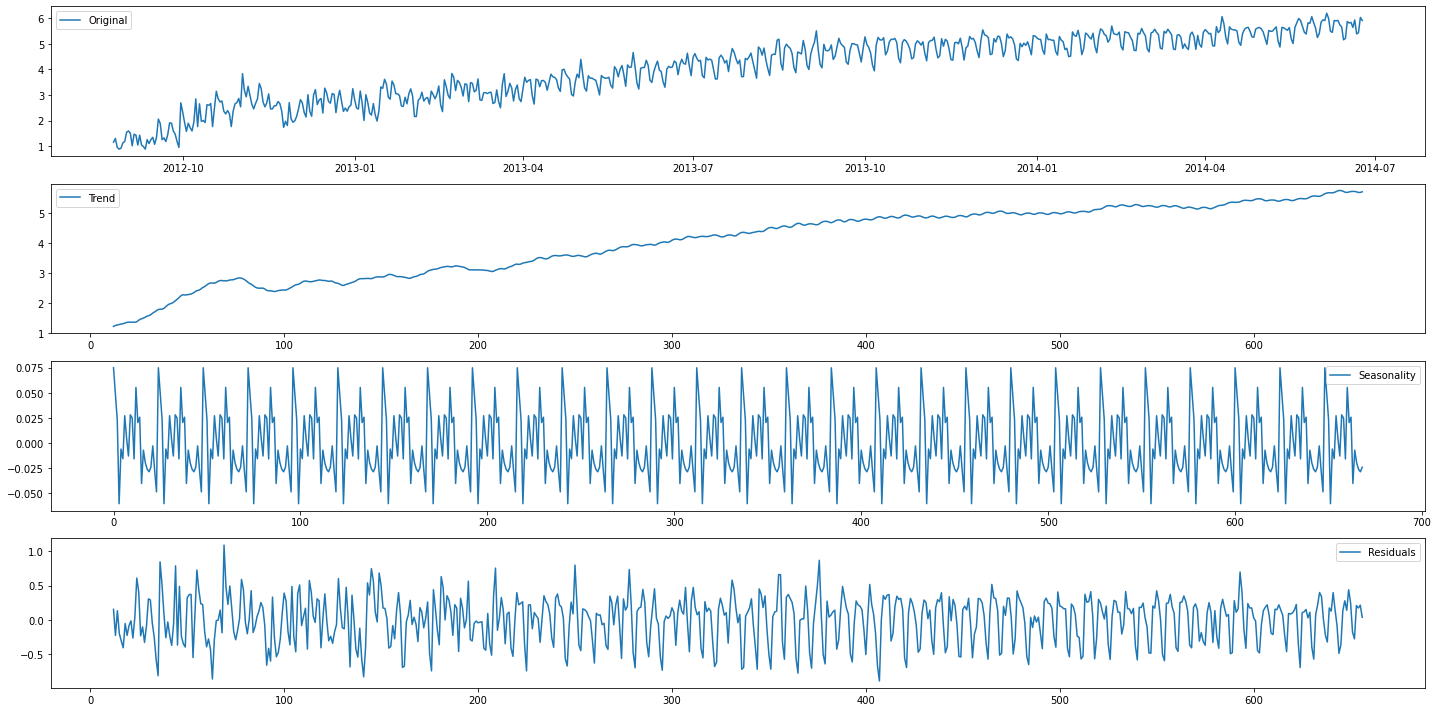

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(pd.DataFrame(train_log).Count.values,freq=24)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')List item
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


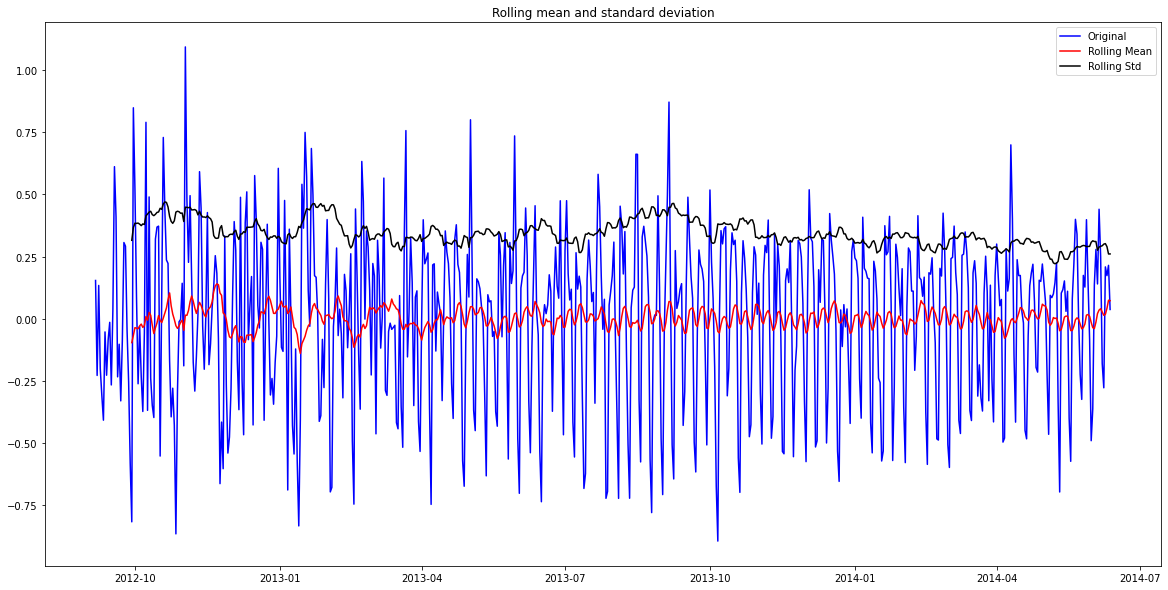

Results of Dickey-Fuller Test
Test Statistic         -7.822096e+00
p-value                 6.628321e-12
#Lags Used              2.000000e+01
No. if Obeser. used     6.240000e+02
Critical Value (1%)    -3.440873e+00
Critical Value (5%)    -2.866183e+00
Critical Value (10%)   -2.569243e+00
dtype: float64


In [79]:
# checking stationarity of residuals.
train_log_decompose=pd.DataFrame(residual)
train_log_decompose['date']=train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])


#### Forcasting the time series using ARIMA 
<br>We have to find the optimized values for the p,d,q parameters. We will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.
<br> ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.
<br>PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. 


In [83]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(train_log_diff.dropna(),nlags=25,method='ols')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


### ACF and PACF plot

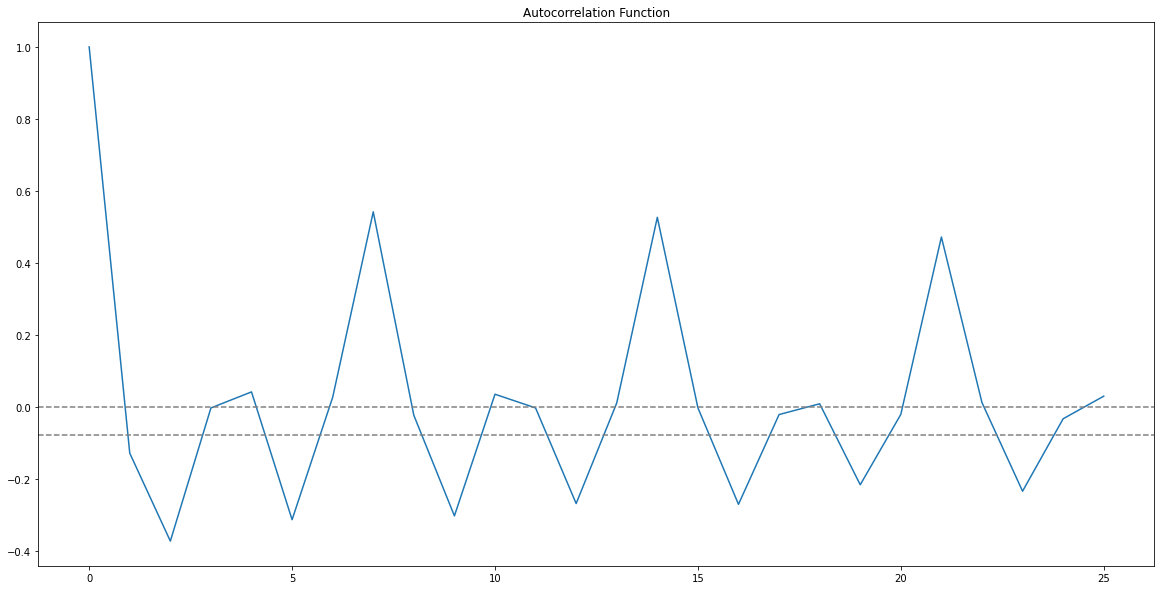

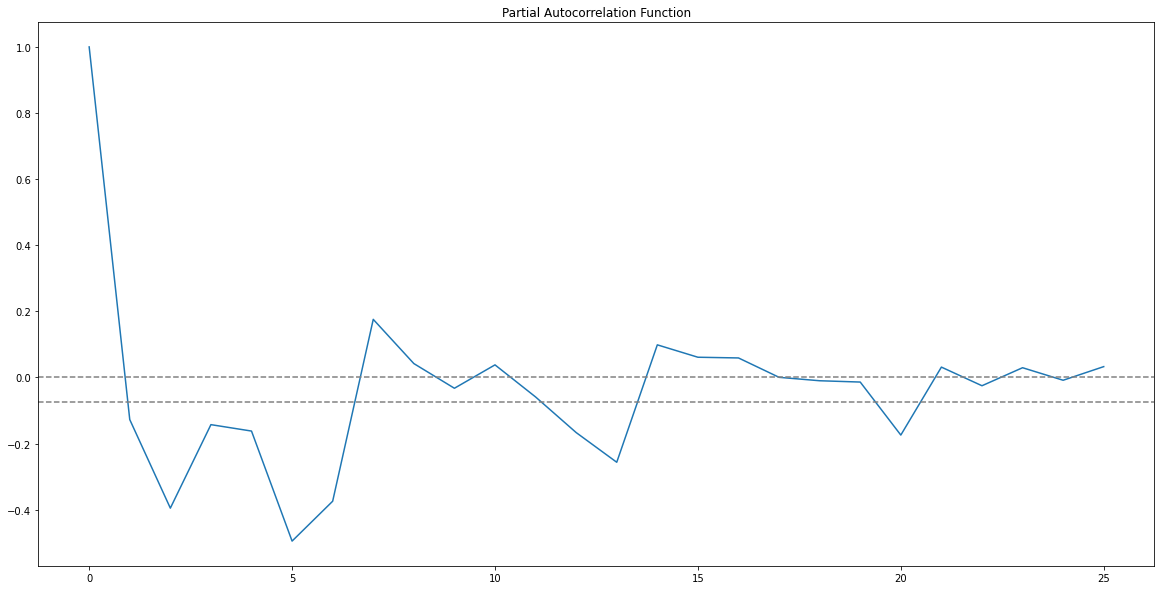

In [84]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

p=2(lag value where the PACF chart crosses the upper confidence interval for the first time.
<br>q=2(lag value where the ACF chart crosses the upper confidence interval for the first time)
<br> We will make the AR and MR model separately and combine them together. 

### AR model
The autoregressive model specifies that the output variables depends linerly on its previous values.

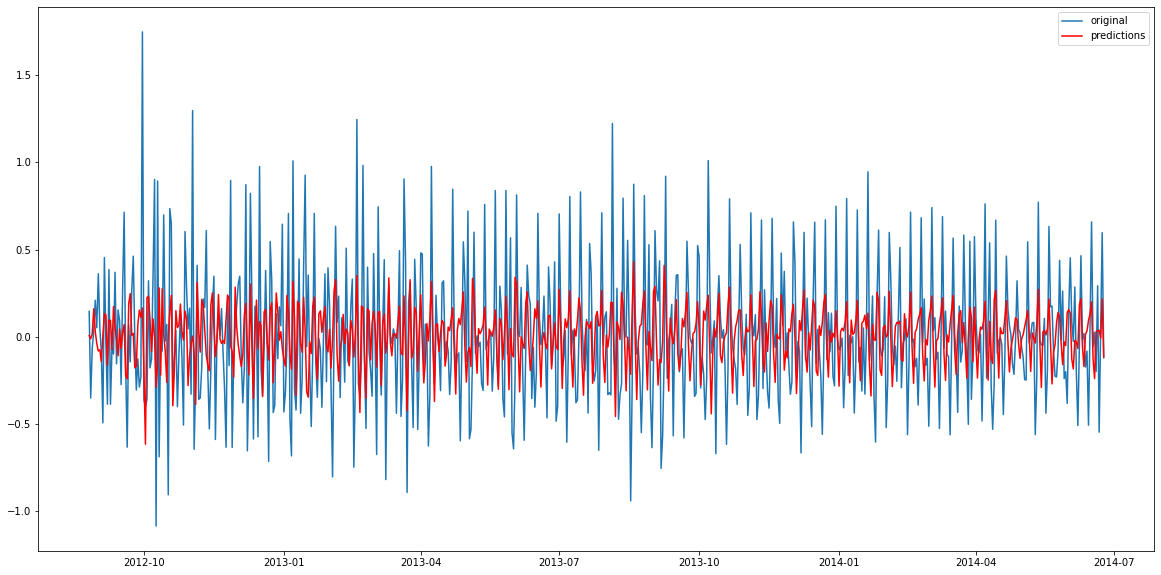

In [85]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train_log,order=(2,1,0)) # here q value is 0 this is AR model
results_AR=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_AR.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show()

In [87]:
AR_predict=results_AR.predict(start="2014-06-25",end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict=np.exp(AR_predict1)


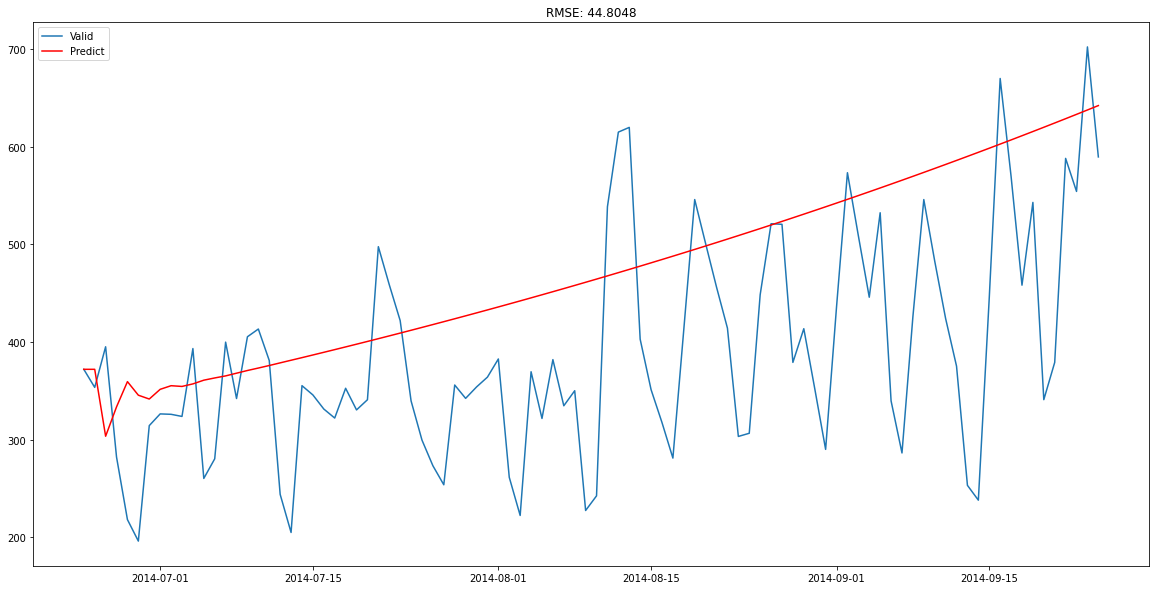

In [89]:
plt.plot(valid['Count'],label="Valid")
plt.plot(AR_predict,color="red",label="Predict")
plt.legend(loc="best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict,valid['Count']))/valid.shape[0]))
plt.show()

### MA model
The moving-average model specifies that the output variable depends linerly on the current and various past values of a stochastic(imperfectly predictable)term.

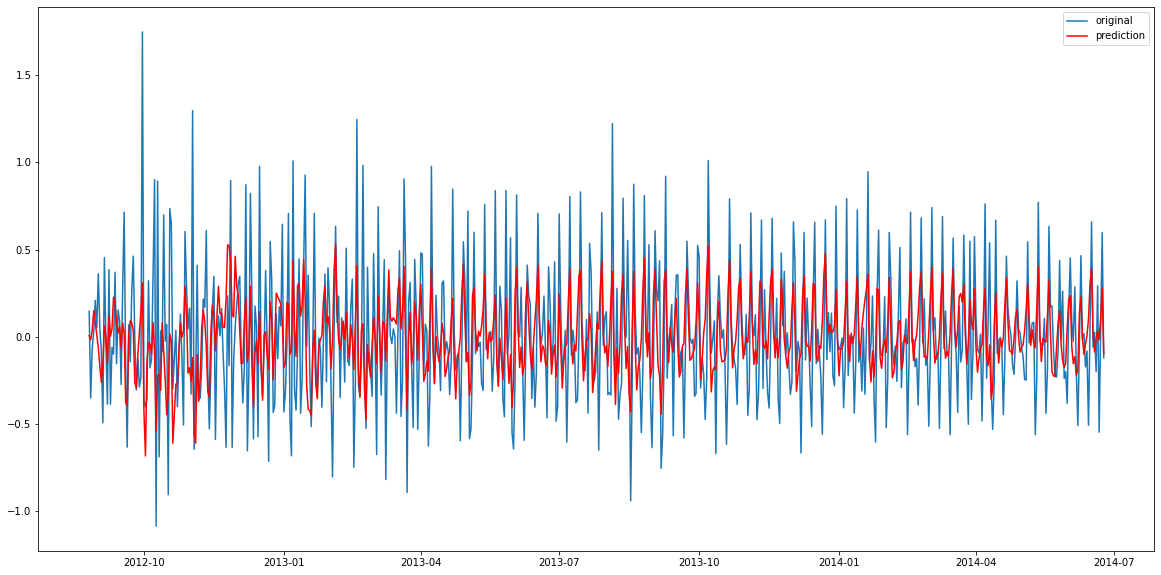

In [91]:
model=ARIMA(train_log, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label="original")
plt.plot(results_MA.fittedvalues,color='red',label="prediction")
plt.legend(loc="best")
plt.show()

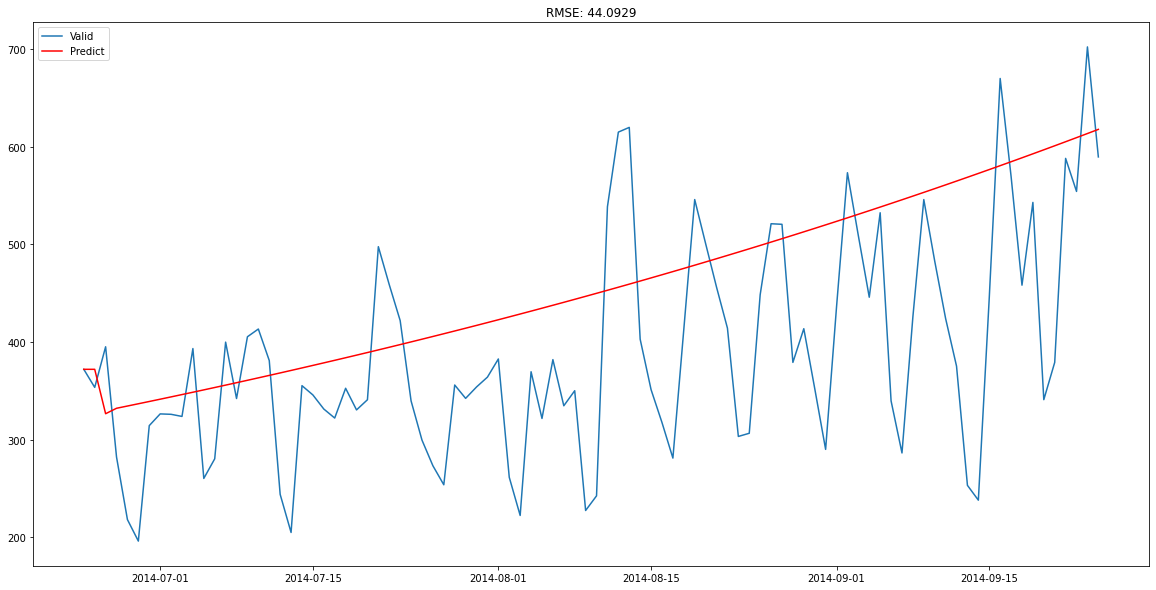

In [92]:
MA_predict=results_MA.predict(start="2014-06-25",end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict=np.exp(MA_predict1)

plt.plot(valid['Count'],label="Valid")
plt.plot(MA_predict,color="red",label="Predict")
plt.legend(loc="best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict,valid['Count']))/valid.shape[0]))
plt.show()

## Combined model



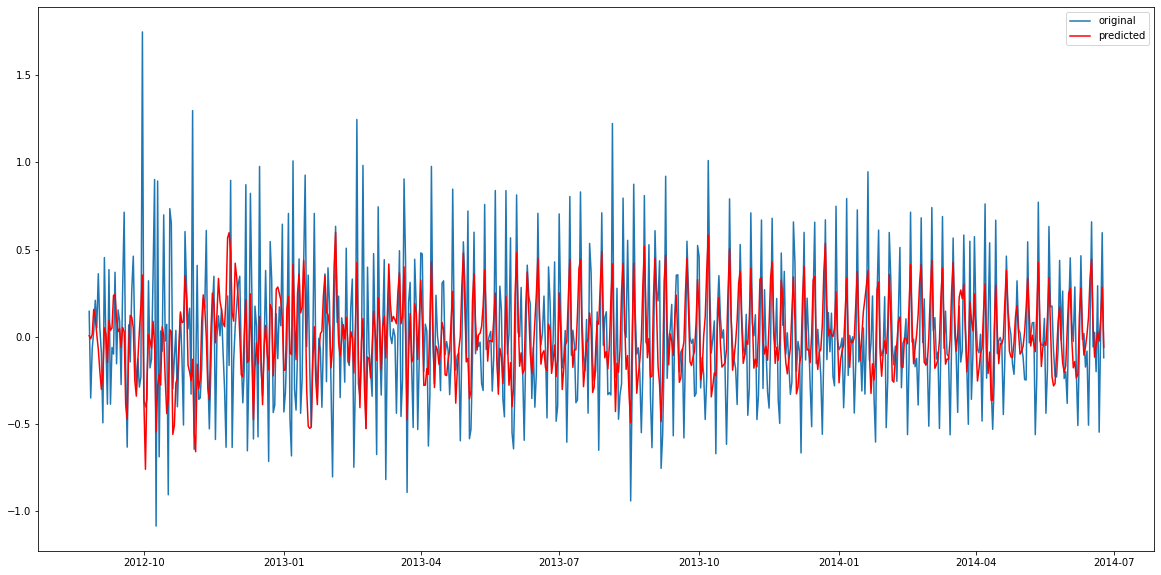

In [93]:
model=ARIMA(train_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_ARIMA.fittedvalues,color='red',label='predicted')
plt.legend(loc='best')
plt.show()


In [94]:
def check_prediction_diff(predict_diff,given_set):
    predict_diff=predict_diff.cumsum().shift().fillna(0)
    predict_base=pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0],index=given_set.index)
    predict_log=predict_base.add(predict_diff,fill_value=0)
    predict=np.exp(predict_log)

    plt.plot(given_set['Count'],label="Given set")
    plt.plot(predict,color="red",label="Predict")
    plt.legend(loc="best")
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()

In [95]:
def check_prediction_log(predict_log,given_set):
  predict=np.exp(predict_log)
  plt.plot(given_set['Count'],label='Given set')
  plt.plot(predict,color='red',label='Predict')
  plt.legend(loc='best')
  plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
  plt.show()

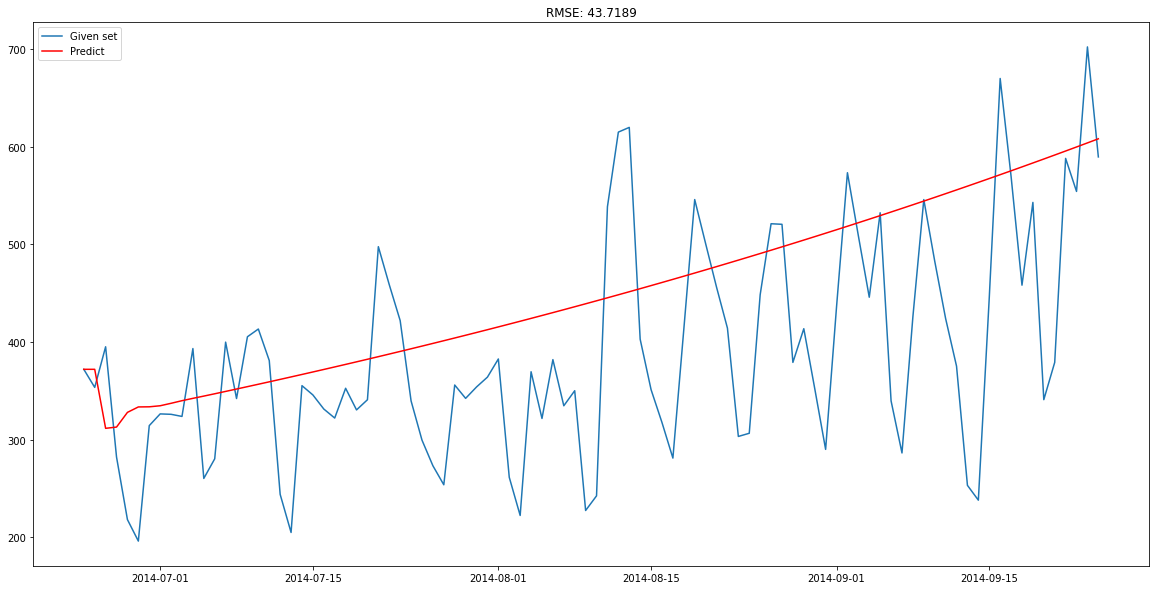

In [96]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25",end="2014-09-25")

check_prediction_diff(ARIMA_predict_diff,valid)